# Tabulky s None

S tabulkami se pracuje pomocí knihovny Pandas. Nejsnazší je tvořit tabulky z
matice nebo po sloupcích. Přitom musí mít každý sloupec stejný počet dat. Potom
jsou všechny sloupce stejně dlouhé. Toto se však nedá zařídit vždy, někdy je
nutno do tabulky přidat sloupec, který je kratší. Řešením je přidat do tabulky
sloupec s libovolnými hodnotami a poté nahradit ta data, která máme k dispozici.
Vhodnou výplní nedefinovaných dat jsou nuly nebo hodnoty `None` nebo `np.nan`.

,a,b,c
0,1.0,2,15.0
1,2.9,3,12.0
2,4.8,4,9.0
3,6.7,5,NaN
4,8.6,None,NaN
5,10.5,None,NaN
6,12.4,None,NaN
7,14.3,None,NaN
8,16.2,None,NaN
9,18.1,None,NaN


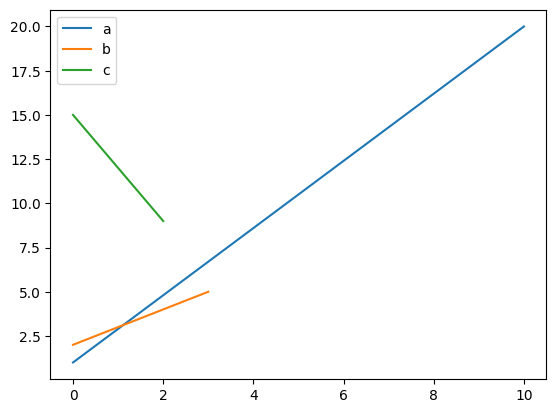

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

N = 11
df = pd.DataFrame()
df["a"] = np.linspace(1,20,N)

# založíme prázdný sloupec a potom jeho začátek přepíšeme daty
df["b"] = None
data = [2,3,4,5]
df.loc[:len(data)-1,"b"] = data

# jiná varianta je nejprve doplnit data a potom zakládat sloupec
data = [15.0,12.0,9.0]
doplnena_data = np.pad(data,(0,N-len(data)), 'constant', constant_values=np.nan)
df["c"] = doplnena_data

df.plot()
df

Ukázkou je rovnice lovu, kdy v pro některé počáteční podmínky je populace
přelovená a dochází k její destrukci. Řešení se nemusí zastavit po dosažení
cílového času, ale při poklesu velikosti populace na nulu. Pokud se snažíme
zapsat dat do jedné tabulky, musíme neobsazená místa zaplnit nedefinovanými hodnotami.

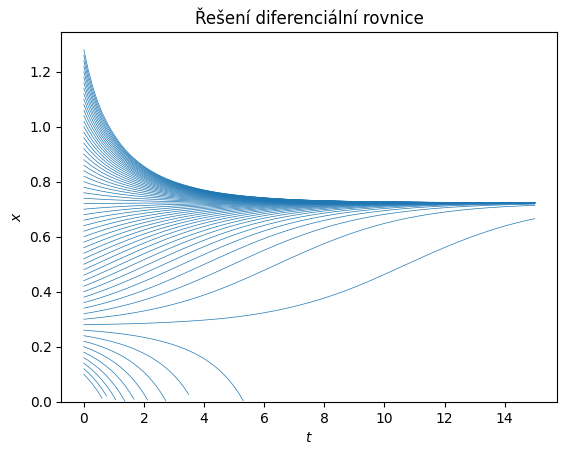

In [22]:
### Příprava funkcí a parametrů
pocatecni_podminky = np.round(np.arange(0.1,1.3,0.02),2)  # počáteční podmínka nebo podmínky
meze = [0,15]  # interval, na kterém hledáme řešení
N = 100 # počet dělících bodů

def model(t, N, r=1,K=1,h=0.2):
    return  r*N*(1-N/K) - h

def destrukce_populace(t,x,r=1,K=1,h=0.15):  # Pokud x klesne na nulu, zastavíme výpočet
    return x
destrukce_populace.terminal = True

### Řešení modelu
t=np.linspace(*meze, N)  # definiční obor, v těchto bodech budeme hledat řešení
df = pd.DataFrame()
df["t"] = t

for pocatecni_podminka in pocatecni_podminky:
    reseni = solve_ivp(
                       model,
                       meze,
                       [pocatecni_podminka],
                       t_eval=t,
                       events=destrukce_populace,
                       )
    data = reseni.y[0]
    if len(data)==N:
        df[pocatecni_podminka] = data
    else:
        df[pocatecni_podminka] = None
        df.loc[:len(data)-1,pocatecni_podminka] = data
        # jina varianta je nejprve doplnit data a potom zakladat sloupec
        # doplnena_data = np.pad(data,(0,N-len(data)), 'constant', constant_values=np.nan)
        # df[pocatecni_podminka] = doplnena_data

### Vizualizace řešení

ax = df.plot(x="t",lw=0.5,legend=False,color="C0")
ax.set(
    ylim = (0,None),
    title = "Řešení diferenciální rovnice",
    xlabel=r"$t$",
    ylabel=r"$x$",
);

Začátek a konec tabulky s jedním předčasně končícím řešením.

In [12]:
df.loc[:,[0.24,0.5,0.8]].head(n=10)

,0.24,0.5,0.8
0,0.24,0.500000,0.800000
1,0.237225,0.507573,0.794205
2,0.234217,0.515129,0.788898
3,0.230955,0.522650,0.784023
4,0.227417,0.530120,0.779548
5,0.22358,0.537521,0.775442
6,0.219411,0.544839,0.771675
7,0.214874,0.552058,0.768219
8,0.209926,0.559164,0.765046
9,0.204521,0.566144,0.762127


In [14]:
df.loc[:,[0.24,0.5,0.8]].tail(n=10)

,0.24,0.5,0.8
90,None,0.722593,0.723826
91,None,0.722658,0.723811
92,None,0.722719,0.723798
93,None,0.722775,0.723785
94,None,0.722828,0.723774
95,None,0.722876,0.723763
96,None,0.722922,0.723753
97,None,0.722965,0.723743
98,None,0.723006,0.723734
99,None,0.723045,0.723726
